## LSTM Model

#### Plan of attack:

- Step1 : Merge all numerical features and scale it.

- Step2 : We will concate all the feature under one block.

- Step3 : pass this blob through NN, let's the output.





In [0]:
import pandas as pd
import numpy as np

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# keras  
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Flatten, LSTM, Dense, Dropout
from keras.models import Sequential, Model
from keras.utils import plot_model

# callback and early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Loading word 2 vec model

In [17]:

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# 
import gensim
from gensim import models

word2vec = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

--2020-06-12 07:49:08--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.241.86
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.241.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.2MB/s    in 99s     

2020-06-12 07:50:47 (15.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

Found 3000000 word vectors of word2vec


### 1.1 Loading pre-processed data

In [4]:
#importing clean text 
data = pd.read_csv('preprocessed_data.csv')
data.head()

,city,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,votes,review,word_count
0,Yorkton,25,0,0,0,3.3,26,love arigato sushi best restaurant yorkton alw...,247
1,Lucknow,800,0,0,0,4.6,567,simply love placeit ideal breakfastlunchdinner...,99
2,Vernonia,10,0,0,0,4.3,88,delicious theres single dish ive tried blue ho...,55
3,Mayfield,20,0,0,0,2.9,11,lot food many varieties sushi fresh love many ...,306
4,Guwahati,400,0,0,0,4.1,377,th avenue cafe always favoriteloved cheesy mea...,48


### 1.2 Seperating target and feature column

In [0]:
# seperating feature and target column
y = data_nlp['aggregate_rating']
X = data_nlp.drop(['aggregate_rating','city', 'review'],axis = 1)

### 2.1 Splitting into train, test and validation set

In [0]:
# Splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

### 2.2 Embedding layer for Numeraical Features

In [0]:
## reshape the numerical features to (-1,1)

# Train data
tr_1 = x_tr['votes'].values.reshape(-1, 1)
tr_2 = x_tr['average_cost_for_two'].values.reshape(-1, 1)
tr_3 = x_tr['word_count'].values.reshape(-1, 1)
tr_4 = x_tr['has_table_booking'].values.reshape(-1, 1)
tr_5 = x_tr['has_online_delivery'].values.reshape(-1, 1)
tr_6 = x_tr['is_delivering_now'].values.reshape(-1, 1)

# CV
cv_1 = x_cv['votes'].values.reshape(-1, 1)
cv_2 = x_cv['average_cost_for_two'].values.reshape(-1, 1)
cv_3 = x_cv['word_count'].values.reshape(-1, 1)
cv_4 = x_cv['has_table_booking'].values.reshape(-1, 1)
cv_5 = x_cv['has_online_delivery'].values.reshape(-1, 1)
cv_6 = x_cv['is_delivering_now'].values.reshape(-1, 1)


# Test Data
test_1 = x_test['votes'].values.reshape(-1, 1)
test_2 = x_test['average_cost_for_two'].values.reshape(-1, 1)
test_3 = x_test['word_count'].values.reshape(-1, 1)
test_4 = x_test['has_table_booking'].values.reshape(-1, 1)
test_5 = x_test['has_online_delivery'].values.reshape(-1, 1)
test_6 = x_test['is_delivering_now'].values.reshape(-1, 1)

### 2.3 Concate Numerical Feature

In [0]:
# Train
tr_num = np.concatenate((tr_1, tr_2, tr_3, tr_4, tr_5, tr_6), axis = 1)

# CV
cv_num = np.concatenate((cv_1, cv_2, cv_3 ,cv_4, cv_5, cv_6), axis = 1)

# Test
test_num = np.concatenate((test_1, test_2, test_3, test_4, test_5, test_6), axis = 1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

tr_num = scaler.fit_transform(tr_num)

# always avoid data leakage
cv_num = scaler.transform(cv_num)
test_num = scaler.transform(test_num)

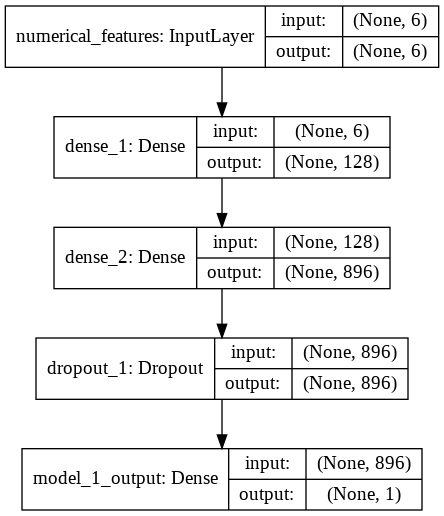

In [15]:
inp_num = Input(shape=(6,), name = "numerical_features")
emb_num = Dense(128, activation = "relu")(inp_num)

# Dense Layer 1
DL1 = Dense(896, activation = 'relu')(emb_num)

# Dropout 1
DP1 = Dropout(0.5)(DL1)

# Output
output = Dense(1, activation = 'linear', name= 'model_1_output')(DP1)

model1 = Model(inputs =inp_num, outputs = output)

plot_model(model1, show_shapes=True,show_layer_names=True, to_file='model1.png')

In [16]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
numerical_features (InputLay (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 896)               115584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 896)               0         
_________________________________________________________________
model_1_output (Dense)       (None, 1)                 897       
Total params: 117,377
Trainable params: 117,377
Non-trainable params: 0
_________________________________________________________________


### Neural network param calculations,



at dense_1 layer = (6+1(bias)) * 128 = 896 <br>

at dense_18 layer = (128 + 1 (bias) ) * 896 = 115584 <br>
at model_1_output = (896+1) * 1 = 897 <br>
<br>
**Total params adding all = 896 + 115584 + 897 = 117,377**

In [19]:

# mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

# 
filepath = '/content/gdrive/My Drive/restaurant_rating/lstm_model_2.h5'

# 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [20]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_1 = model1.fit(tr_num, y_tr, 
                       batch_size = 512,
                       epochs = 20, 
                       validation_data = (cv_num, y_cv), 
                       verbose = 1, 
                       callbacks = [es, checkpoint])

Train on 537 samples, validate on 135 samples
Epoch 1/20
537/537 [==============================] - 2s 3ms/step - loss: 10.8907 - val_loss: 7.5176

Epoch 00001: val_loss improved from inf to 7.51757, saving model to /content/gdrive/My Drive/restaurant_rating/lstm_model_2.h5
Epoch 2/20
537/537 [==============================] - 0s 24us/step - loss: 7.8571 - val_loss: 5.5657

Epoch 00002: val_loss improved from 7.51757 to 5.56574, saving model to /content/gdrive/My Drive/restaurant_rating/lstm_model_2.h5
Epoch 3/20
537/537 [==============================] - 0s 23us/step - loss: 5.8537 - val_loss: 4.5490

Epoch 00003: val_loss improved from 5.56574 to 4.54903, saving model to /content/gdrive/My Drive/restaurant_rating/lstm_model_2.h5
Epoch 4/20
537/537 [==============================] - 0s 26us/step - loss: 4.4838 - val_loss: 4.3647

Epoch 00004: val_loss improved from 4.54903 to 4.36468, saving model to /content/gdrive/My Drive/restaurant_rating/lstm_model_2.h5
Epoch 5/20
537/537 [======

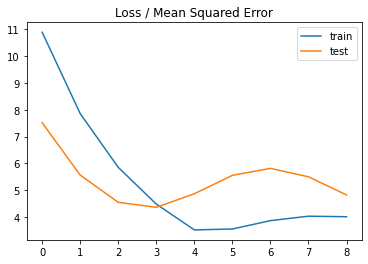

In [21]:
from matplotlib import pyplot

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_1.history['loss'], label='train')
pyplot.plot(history_1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [23]:
# evaluate the model
train_mse = model1.evaluate(tr_num, y_tr, verbose=0)
cv_mse = model1.evaluate(cv_num, y_cv, verbose=0)
test_mse = model1.evaluate(test_num, y_test, verbose=0)
print('Train: %.3f,CV: %.3f, Test: %.3f' % (train_mse, cv_mse,test_mse))

Train: 3.463,CV: 4.824, Test: 2.467


## Observation

In [0]:
y_pred_lstm = model1.predict(test_num)
y_pred_lstm = y_pred_lstm.flatten()

In [25]:
nnpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lstm })
nnpred

,actual,pred
695,0.0,3.846650
816,3.7,3.922596
30,4.6,2.977377
599,0.0,2.601082
96,3.5,4.436348
...,...,...
422,4.0,4.064436
687,3.4,2.979033
218,3.8,4.358667
706,0.0,2.715942


# Summary




# References